In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('heart_attack_data.csv')

In [4]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
# changing values in gender, if value is 1 then male, else female

df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [6]:
df['Gender'].value_counts()

Gender
Male      870
Female    449
Name: count, dtype: int64

In [7]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,Male,66,160,83,160.0,1.80,0.012,negative
1,21,Male,94,98,46,296.0,6.75,1.060,positive
2,55,Male,64,160,77,270.0,1.99,0.003,negative
3,64,Male,70,120,55,270.0,13.87,0.122,positive
4,55,Male,64,112,65,300.0,1.08,0.003,negative


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   object 
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 92.9+ KB


In [9]:
df.describe()

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [10]:
df['Result'].value_counts()

Result
positive    810
negative    509
Name: count, dtype: int64

In [12]:
# Create age groups (e.g., <30, 30-40, 41-50, 51-60, >60) for better visualization.

def categorize_age(age):
    if age < 30:
        return '<30'
    elif age <= 40:
        return '30-40'
    elif age <= 50:
        return '41-50'
    elif age <= 60:
        return '51-60'
    else:
        return '>60'

df['Age Group'] = df['Age'].apply(categorize_age)

df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Blood_sugar_category,Age Group
0,64,Male,66,160,83,160.0,1.80,0.012,negative,High,>60
1,21,Male,94,98,46,296.0,6.75,1.060,positive,High,<30
2,55,Male,64,160,77,270.0,1.99,0.003,negative,High,51-60
3,64,Male,70,120,55,270.0,13.87,0.122,positive,High,>60
4,55,Male,64,112,65,300.0,1.08,0.003,negative,High,51-60


In [13]:
df['Blood_sugar_category'].value_counts()

Blood_sugar_category
Normal    684
High      618
Low        17
Name: count, dtype: int64

In [14]:
df['Age Group'].value_counts()

Age Group
>60      514
51-60    354
41-50    275
30-40    123
<30       53
Name: count, dtype: int64

C:\Users\KOJO\AppData\Local\Temp\ipykernel_27144\2953243709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette='Set2')


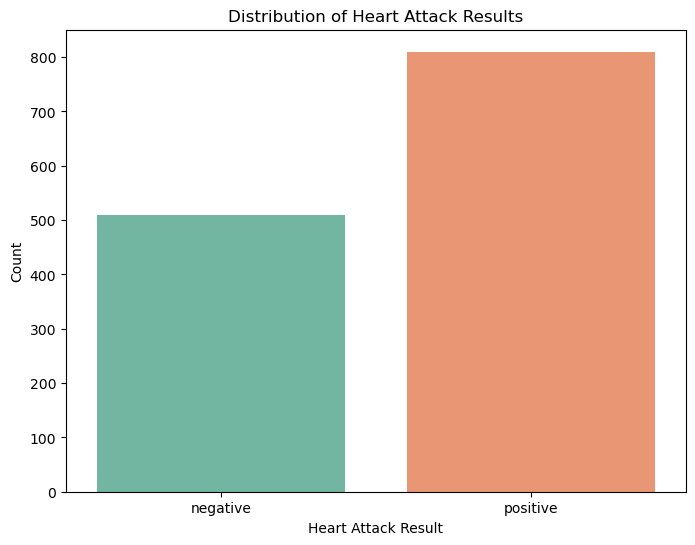

In [23]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=df, palette='Set2')
plt.title('Distribution of Heart Attack Results')
plt.xlabel('Heart Attack Result')
plt.ylabel('Count')
plt.show()

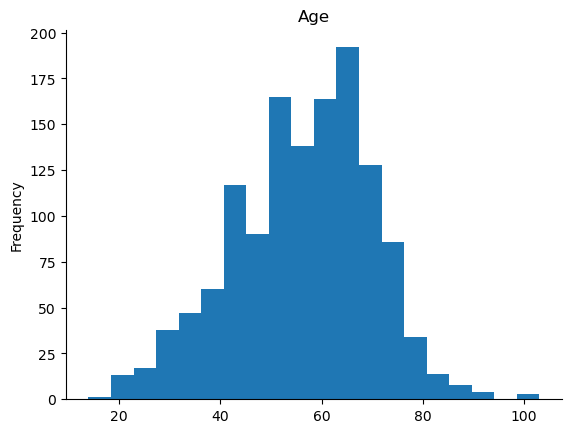

In [15]:
# Age distribution Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

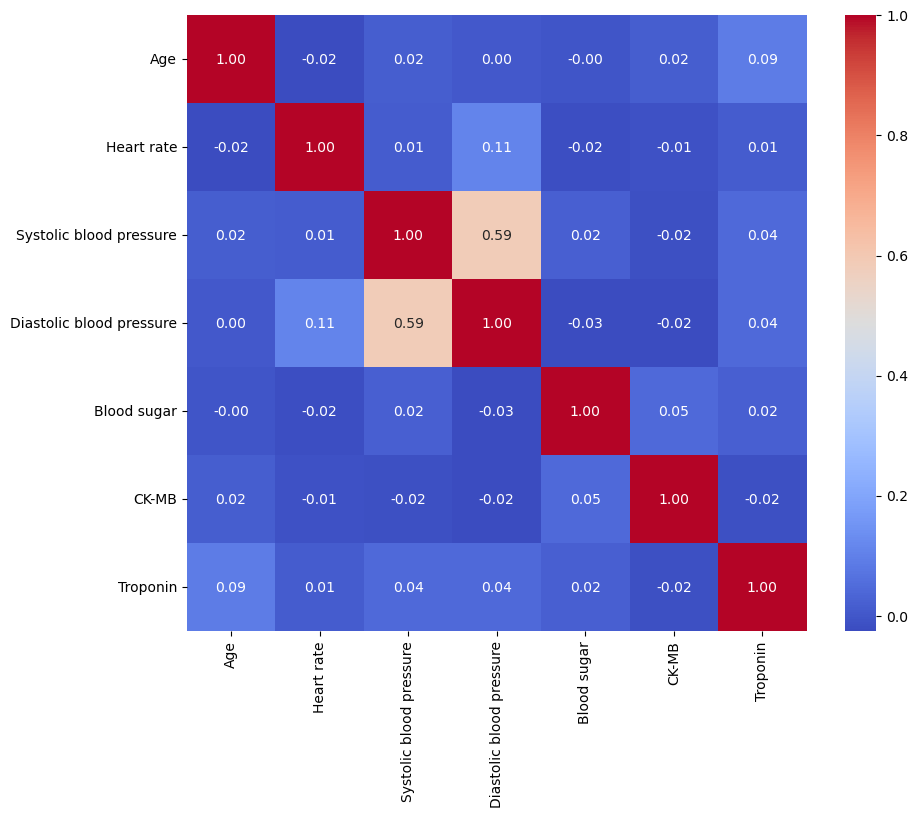

In [16]:
# HEAT MAP FOR CORRELATIONS

# selecting columns that are numbers
num_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = num_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")



**DATA PREPROCESSING PHASE**

In [17]:
# function that preprocesses data (changing object to numbers, using pd.getdummies for categorical values)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocess_for_ridge(data, target_column, categorical_columns, test_size=0.2, random_state=42):
    """
    Preprocess data for ridge regression: encode categorical variables, split data, and standardize features.

    Parameters:
    - data (pd.DataFrame): Input dataset with features and target.
    - target_column (str): Name of the target column (continuous).
    - categorical_columns (list): List of column names for categorical features.
    - test_size (float): Proportion of data for testing (default: 0.2).
    - random_state (int): Random seed for reproducibility (default: 42).

    Returns:
    - X_train (np.array): Standardized training features.
    - X_test (np.array): Standardized testing features.
    - y_train (np.array): Training target values.
    - y_test (np.array): Testing target values.
    - preprocessor (ColumnTransformer): Fitted preprocessor for future use.
    """
    # Step 1: Split features and target
    X = data.drop(columns=[target_column])
    y = data[target_column].values

    # Step 2: Identify numerical columns
    numerical_columns = [col for col in X.columns if col not in categorical_columns]

    # Step 3: Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns),
            ('num', StandardScaler(), numerical_columns)
        ])

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Step 5: Apply encoding and standardization
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.transform(X_test)

    # Step 6: Verify data format
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return X_train, X_test, y_train, y_test, preprocessor

# calling the function
X_train, X_test, y_train, y_test, preprocessor = preprocess_for_ridge(df, 'Result', ['Gender', 'Age Group', 'Blood_sugar_category'])

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1055, 14)
(264, 14)
(1055,)
(264,)


TRAINING THE MODEL WITH LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7916666666666666

Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.67      0.71       101
    positive       0.81      0.87      0.84       163

    accuracy                           0.79       264
   macro avg       0.78      0.77      0.77       264
weighted avg       0.79      0.79      0.79       264



Lets train the model with XGBOOST TOO

In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode the target labels as integers
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train an XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test set
xgb_pred_encoded = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, xgb_pred_encoded))
print("\nXGBoost Classification Report:\n", classification_report(y_test_encoded, xgb_pred_encoded, target_names=le.classes_))

XGBoost Accuracy: 0.9810606060606061

XGBoost Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.97      0.98       101
    positive       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264



c:\Users\KOJO\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:21:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
from google.colab import files

# Save the dataframe to CSV
df.to_csv('cleaned_heart_attack_data.csv', index=False)

# Trigger download
files.download('cleaned_heart_attack_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>